# Regression PART 2: Multiple Regression (Interpretation)

The goal of this first notebook is to explore multiple regression and feature engineering with existing functions.

In this notebook you will use data on house sales in King County to predict prices using multiple regression. You will:
* Use pandas to do some feature engineering
* Use built-in graphlab functions to compute the regression weights (coefficients/parameters)
* Given the regression weights, predictors and outcome write a function to compute the Residual Sum of Squares
* Look at coefficients and interpret their meanings
* Evaluate multiple models via RSS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load in house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('kc_house_data.csv')
sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Split data into training and testing.
We use random_state=0 so that everyone running this notebook gets the same results. In practice, you may set a random state (or let sklearn pick a random seed for you).  

In [3]:
x = sales.drop(['id','date','price' ], axis=1)
y = sales['price']
from sklearn.model_selection import train_test_split  
x_train, x_test,y_train, y_test = train_test_split(x ,y , test_size=.2,random_state=40)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(17290, 18) (17290,)
(4323, 18) (4323,)


In [4]:
x1 = pd.DataFrame(sales.drop(['id','date','price' ], axis=1))
y1 = pd.DataFrame(sales['price'])
from sklearn.model_selection import train_test_split  
x_train1, x_test1,y_train1, y_test1 = train_test_split(x1 ,y1 , test_size=.2,random_state=40)
print(x_train1.shape, y_train1.shape)

print(x_test1.shape, y_test1.shape)

(17290, 18) (17290, 1)
(4323, 18) (4323, 1)


# Learning a multiple regression model

Recall we can use the following code to learn a multiple regression model predicting 'price' based on the following features:
example_features = ['sqft_living', 'bedrooms', 'bathrooms'] on training data with the following code:

(Aside: We set validation_set = None to ensure that the results are always the same)

In [5]:
print(sales.columns)
#print(sales[['sqft_living','bedrooms','bathrooms']])


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
x_train[['sqft_living']]

,sqft_living
7495,2670
8804,2880
21471,3130
9890,980
16340,660
3013,970
20021,1490
17362,2820
20540,1300
7899,1020


In [9]:
print(x_train[['sqft_living','bedrooms','bathrooms']])

       sqft_living  bedrooms  bathrooms
7495          2670         5       3.00
8804          2880         3       3.00
21471         3130         4       2.50
9890           980         2       1.00
16340          660         2       0.75
3013           970         3       1.00
20021         1490         3       2.00
17362         2820         3       2.50
20540         1300         3       2.50
7899          1020         3       2.50
13513         2340         3       2.50
12993         1610         3       1.00
8717          2460         5       1.75
13356         2230         2       1.75
157           2640         4       2.75
8975          2750         4       2.50
3379          1910         3       1.75
4706           950         3       1.00
18010         1540         3       3.25
3102          3020         4       2.50
2093          1850         2       1.50
9521           880         2       1.50
17096         1560         3       1.00
8277          2090         3       2.50


In [10]:
example_features = ['sqft_living', 'bedrooms', 'bathrooms']
from sklearn.linear_model import LinearRegression
example_model = LinearRegression()

example_model.fit(x_train[example_features] , y_train )
y_predicted=example_model.predict (x_test[example_features])
print(y_predicted)

[1061074.98382581  714759.80251645  512950.0595231  ...  487070.58310698
  841040.77497389  296612.75190125]


In [16]:
y_predicted.shape

(4323,)

In [17]:
from sklearn.linear_model import LinearRegression
ex_model = LinearRegression()
# with no of input features use same features for prediction also shape as to be same as model_fit
ex_model.fit(x_train[['sqft_living']],y_train)
yout = ex_model.predict(x_test[['sqft_living']])
print(yout)

[1034365.90370503  729325.07820192  492071.10281061 ...  415810.89643483
  839478.7096336   308481.71709114]


In [18]:
yout.shape

(4323,)

In [20]:
# with all features considered predicted value is less than above with only 3 features

all_features =x.columns
from sklearn.linear_model import LinearRegression
all_model = LinearRegression()

all_model.fit(x_train1[all_features] , y_train1 )
y_pred = all_model.predict (x_test1[all_features])
print(y_pred.shape ,y_pred)

(4323, 1) [[1034552.08323431]
 [ 721531.80868137]
 [ 339072.94251236]
 ...
 [ 592188.77877616]
 [ 813890.67135235]
 [ 380647.21592898]]


In [24]:
# test r_2 score for models with 1,3, all feeatures used with true value of output
from sklearn.metrics import r2_score
print(' r2_score of model with using 3 variables' ,  r2_score( y_test , yout))
print(' r2_score of model with using 3 variables' ,  r2_score( y_test , y_predicted))
print(' r2_score of model with using all variables' ,  r2_score( y_test , y_pred))

 r2_score of model with using 3 variables 0.5035535751151091
 r2_score of model with using 3 variables 0.5113409531642946
 r2_score of model with using all variables 0.698935541005909


In [25]:
print( 'weights of model with 1 variables' , ex_model.coef_)
print( 'weights of model with 3 variables' , example_model.coef_)
print('weights with all variables' , all_model.coef_)


weights of model with 1 variables [282.4452088]
weights of model with 3 variables [   312.51078798 -60699.31891122   8803.53028919]
weights with all variables [[-3.74051907e+04  4.30570696e+04  1.10771754e+02  1.13548457e-01
   5.68452366e+03  6.07151690e+05  5.38293193e+04  2.57068322e+04
   9.54362689e+04  7.14093530e+01  3.93624007e+01 -2.63163434e+03
   2.25150605e+01 -5.94778203e+02  6.04049242e+05 -2.16267424e+05
   2.33152173e+01 -3.66312792e-01]]


# Making Predictions

In the gradient descent notebook we use numpy to do our regression. In this book we will use existing scikit_learn create functions to analyze multiple regressions. 

Recall that once a model is built we can use the .predict() function to find the predicted values for data we pass. For example using the example model above:

In [29]:
# prediction is done above only  this is just for filling the blank

example_predictions1 = all_model.predict(x_test1[all_features])
print(example_predictions1[0] ) # should be 271789.505878
print(example_predictions1[:10])

[1034552.08323431]
[[1034552.08323431]
 [ 721531.80868137]
 [ 339072.94251236]
 [ 284598.97354358]
 [ 434341.65684009]
 [ 784154.98592425]
 [ 904346.25994483]
 [ 821184.7397613 ]
 [ 397811.05866046]
 [ 564788.73476523]]


# Compute RSS

Now that we can make predictions given the model, let's write a function to compute the RSS of the model. Complete the function below to calculate RSS given the model, data, and the outcome.

In [60]:
# its mean_sqaure_error 
def get_residual_sum_of_squares(model, data, outcome):
    
    # First get the predictions
    predictions=model.predict(data)

    # Then compute the residuals/errors
    
    res=outcome-predictions
    # Then square and add them up
    
    rss=(res*res).sum()
    RSS = rss/len(outcome)
    
    return RSS ,res  

Test your function by computing the RSS on TEST data for the example model:

In [61]:
# for only 3 variables
rss_example_train ,res = get_residual_sum_of_squares(example_model, x_test[example_features], y_test)
print (rss_example_train,'\n',res) 


61472087397.619514 
 21568    638925.016174
3040      49016.197484
198      -72950.059523
16456     17703.647458
19502   -110333.688716
9988    -167015.628027
6754     131188.372849
9725     -32335.145690
9457      49240.552113
9688     -26883.184319
9550     138674.616837
1556    -120746.328924
1430      85975.451324
617      -18574.735884
10066    -14064.982375
20336   -203576.677720
16718    -65376.711530
4264    -102591.586296
19132     81160.107598
9342    -266350.863960
14858    159489.904834
20091   -228169.429160
12148    -10963.176536
2331     163517.534210
10116    -95721.688830
13533    -37569.729087
18144    -69817.000719
5860      -9531.982173
17962   -159448.850491
11145     70263.618354
             ...      
12233   -234833.582029
9528      76422.641191
1536     200259.387442
20467    137061.343555
2424     107962.898198
12605     82633.387972
8759     155513.650536
9884    -332880.595204
9762    -228273.166965
19040    -13768.022544
17041    -65394.155878
14198    -244

In [62]:
# for all variables

rss_example_train1 ,res1 = get_residual_sum_of_squares(all_model, x_test1[all_features], y_test1)
print (rss_example_train1,'\n' ,res1) 

price    3.787316e+10
dtype: float64 
                price
21568  665447.916766
3040    42244.191319
198    100927.057488
16456  185401.026456
19502   10658.343160
9988   -67654.985924
6754   134653.740055
9725  -152184.739761
9457    13188.941340
9688    76211.265235
9550    76484.986899
1556    99187.147426
1430   -52040.306765
617    -18161.928050
10066   57348.495611
20336  -65508.880486
16718 -164246.447719
4264   -17373.406762
19132   -8899.031296
9342   -74224.211193
14858   -5877.126787
20091   17510.664232
12148   -8759.345880
2331   205515.388809
10116  -43102.378016
13533   72214.784434
18144   80347.269240
5860  -107813.711448
17962 -174707.347214
11145   41433.903923
...              ...
12233 -339339.283179
9528    -7923.770918
1536    83748.118509
20467  201507.289731
2424   143433.124864
12605  -29746.431405
8759     2736.772361
9884  -383447.658058
9762   -76595.787662
19040   97128.688026
17041   67463.936973
14198   16078.205990
17428  193006.858077
20402 -131089.66

# Create some new features

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, squarefeet, and # of bathrooms) but we can also consider transformations of existing features e.g. the log of the squarefeet or even "interaction" features such as the product of bedrooms and bathrooms.

You will use the logarithm function to create a new feature. so first you should import it from the math library.

In [63]:
from math import log

Next create the following 4 new features as column in both TEST and TRAIN data:
* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqft_living = log(sqft_living)
* lat_plus_long = lat + long 
As an example here's the first one:

In [64]:
x_train['bedrooms_squared'] = x_train['bedrooms'].apply(lambda x: x**2)
x_test['bedrooms_squared'] = x_test['bedrooms'].apply(lambda x: x**2)
#x_train['bedrooms_squared']=x_train['bedrooms']**2 # both are same just its power square
print(x_train.shape ,x_test.shape,'\n',x_train,x_test)

(17290, 22) (4323, 22) 
        bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
7495          5       3.00         2670     11761     1.0           0     0   
8804          3       3.00         2880      3750     2.0           0     0   
21471         4       2.50         3130      5795     2.0           0     0   
9890          2       1.00          980      5393     1.0           0     0   
16340         2       0.75          660      5240     1.0           0     0   
3013          3       1.00          970      9130     1.0           0     0   
20021         3       2.00         1490      1286     3.0           0     0   
17362         3       2.50         2820     14890     1.0           0     4   
20540         3       2.50         1300      1362     2.0           0     0   
7899          3       2.50         1020      1570     2.0           0     0   
13513         3       2.50         2340      1919     2.0           0     2   
12993         3       1.00 

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
# create the remaining 3 features in both TEST and TRAIN data
x_train['bed_bath_rooms'] = x_train['bedrooms']* x_train['bathrooms']
x_test['bed_bath_rooms'] = x_test['bedrooms']* x_test['bathrooms']

x_train['log_sqft_living'] = x_train['sqft_living'].apply(log)
x_test['log_sqft_living'] = x_test['sqft_living'].apply(log)

x_train['lat_plus_long'] = x_train['lat']* x_train['long']
x_test['lat_plus_long'] = x_test['lat']* x_test['long']
#train_data
#test_data #checking data after getting some changes(inserts)


C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [66]:
print ( x_train.shape ,x_test.shape ,'\n' ,x_train,x_test)

(17290, 22) (4323, 22) 
        bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
7495          5       3.00         2670     11761     1.0           0     0   
8804          3       3.00         2880      3750     2.0           0     0   
21471         4       2.50         3130      5795     2.0           0     0   
9890          2       1.00          980      5393     1.0           0     0   
16340         2       0.75          660      5240     1.0           0     0   
3013          3       1.00          970      9130     1.0           0     0   
20021         3       2.00         1490      1286     3.0           0     0   
17362         3       2.50         2820     14890     1.0           0     4   
20540         3       2.50         1300      1362     2.0           0     0   
7899          3       2.50         1020      1570     2.0           0     0   
13513         3       2.50         2340      1919     2.0           0     2   
12993         3       1.00 

* Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this feature will mostly affect houses with many bedrooms.
* bedrooms times bathrooms gives what's called an "interaction" feature. It is large when *both* of them are large.
* Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.
* Adding latitude to longitude is totally non-sensical but we will do it anyway (you'll see why)

 What is the mean (arithmetic average) value of your 4 new features on TEST data? (round to 2 digits)**

In [67]:
print (x_train['bedrooms_squared'].mean())
print (x_train['bed_bath_rooms'].mean())
print (x_train['log_sqft_living'].mean())
print (x_train['lat_plus_long'].mean())

12.244013880855986
7.495083863504916
7.549918492680779
-5812.393541132597


# Learning Multiple Models

Now we will learn the weights for three (nested) models for predicting house prices. The first model will have the fewest features the second model will add one more feature and the third will add a few more:
* Model 1: squarefeet, # bedrooms, # bathrooms, latitude & longitude
* Model 2: add bedrooms\*bathrooms
* Model 3: Add log squarefeet, bedrooms squared, and the (nonsensical) latitude + longitude

In [68]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

Now that you have the features, learn the weights for the three different models for predicting target = 'price' using sklearn.linear_model of LinearRegression and look at the value of the weights/coefficients:

In [69]:
# Learn the three models: (don't forget to set validation_set = None)
model_1=LinearRegression()
model_1.fit(x_train[model_1_features], y_train ) 
y_1 = model_1.predict(x_test[model_1_features])
print(y_1.shape ,y_1)

(4323,) [1092740.79977193  688491.97899428  406931.8477779  ...  624365.35381079
  822009.09444152  430482.15770145]


In [70]:
# model2

model_2=LinearRegression()
model_2.fit(x_train[model_2_features], y_train ) 
y_2 = model_2.predict(x_test[model_2_features])
print(y_2.shape ,y_2)

(4323,) [1094272.21072774  683624.45151696  398554.63224195 ...  607911.18577738
  821046.59210192  434687.95224066]


In [71]:
#model 3 

model_3=LinearRegression()
model_3.fit(x_train[model_3_features], y_train ) 
y_3 = model_3.predict(x_test[model_3_features])
print(y_3.shape ,y_3)

(4323,) [1127433.03051758  651701.84252739  386398.72062874 ...  609594.70197487
  808577.86622429  461182.09505081]


In [72]:
# Examine/extract each model's coefficients:
print(model_1.coef_)
print(model_2.coef_)
print(model_3.coef_)

[ 3.10638272e+02 -5.57142200e+04  1.66124517e+04  6.58234089e+05
 -3.10007260e+05]
[ 3.04308487e+02 -1.11013749e+05 -7.46561466e+04  6.54340327e+05
 -2.93502034e+05  2.67055396e+04]
[ 5.36993630e+02 -6.66403973e+03  9.42434318e+04 -1.42945741e+08
  5.55977972e+07 -1.59872910e+04  8.40755729e+02 -5.64691520e+05
 -1.17502597e+06]


In [73]:
# get prediction  on train_data 
pd1 = model_1.predict(x_train[model_1_features])#[:10]

#check price values after (model) as no of features increases the value gets corresponding reasonable values  
print (pd1 )

[706869.65019383 884733.97359565 779058.57898721 ...  72946.99264719
 776901.3292795  110493.25044751]


In [74]:
pd2 = model_2.predict(x_train[model_2_features])#[:10]
print(pd2)

[733553.89120457 858085.57672426 770613.17002217 ...  81449.12801866
 765905.12381892 125322.31309519]


In [75]:
pd3 = model_3.predict(x_train[model_3_features])#[:10]
print(pd3)

[674043.22090054 855107.32230568 761855.56480122 ...  91067.0345068
 712446.81769466 162040.45430565]


# Comparing multiple models

Now that you've learned three models and extracted the model weights we want to evaluate which model is best.

First use your functions from earlier to compute the RSS on TRAINING Data for each of the three models.

In [76]:
# Compute the RSS on TRAINING data for each of the three models and record the values:

rss_model_1_train , res1 = get_residual_sum_of_squares(model_1, x_train[model_1_features], y_train)
print (rss_model_1_train ,res1,sep ='\n' )


56415625427.43306
7495    -1.918697e+05
8804     1.152660e+05
21471   -2.540586e+05
9890     3.908882e+04
16340    5.358962e+04
3013     6.540077e+04
20021    2.413534e+04
17362   -4.193543e+04
20540   -1.743742e+03
7899     1.168309e+04
13513    1.447886e+05
12993   -1.186910e+05
8717    -1.399475e+05
13356    1.655947e+04
157     -2.560173e+05
8975     1.282058e+05
3379    -1.703222e+05
4706     1.056301e+05
18010    2.623400e+05
3102     8.592011e+04
2093     1.040223e+05
9521     3.199210e+05
17096   -1.220778e+04
8277    -1.141106e+05
13142    3.455456e+04
8797     7.995062e+04
17635   -1.912697e+05
8182     1.654920e+05
8465    -1.001052e+05
19739   -3.364739e+05
             ...     
3027    -1.701408e+04
2289    -2.249033e+05
2615     8.836675e+04
20167   -1.457896e+05
15203   -4.131767e+04
5142     4.094468e+04
3688     2.986630e+05
16884   -2.807384e+05
860      1.411135e+05
15630    1.258572e+05
17615   -1.121415e+05
3742     1.162867e+05
15796   -6.933845e+04
11272   -1.684

Which model (1, 2 or 3) has lowest RSS on TRAINING Data?** Is this what you expected?

In [77]:
 # rss for model 2
rss_model_2_train , res2 = get_residual_sum_of_squares(model_2, x_train[model_2_features], y_train)
print (rss_model_2_train ,res2,sep = '\n' )



55815607533.503975
7495    -2.185539e+05
8804     1.419144e+05
21471   -2.456132e+05
9890    -1.602956e+03
16340    4.013837e+03
3013     5.666280e+04
20021    3.062318e+04
17362   -2.192971e+04
20540    9.671230e+03
7899     2.131716e+04
13513    1.611460e+05
12993   -1.232192e+05
8717    -1.125327e+05
13356    1.658828e+04
157     -2.516888e+05
8975     1.341489e+05
3379    -1.664218e+05
4706     9.891825e+04
18010    2.836001e+05
3102     9.676692e+04
2093     9.349001e+04
9521     3.020189e+05
17096   -1.456662e+04
8277    -9.548792e+04
13142    3.033854e+04
8797     8.538440e+04
17635   -1.652160e+05
8182     2.193783e+05
8465    -1.053013e+05
19739   -3.189811e+05
             ...     
3027    -1.757944e+04
2289    -2.206802e+05
2615     9.903545e+04
20167   -1.417408e+05
15203   -2.872058e+04
5142     4.403027e+04
3688     2.981439e+05
16884   -2.627099e+05
860      5.632572e+04
15630    1.383479e+05
17615   -9.696011e+04
3742     1.289705e+05
15796   -7.096288e+04
11272   -1.86

In [78]:
# rss for model 3

rss_model_3_train ,res3 = get_residual_sum_of_squares(model_3, x_train[model_3_features], y_train)
print (rss_model_3_train , res3)


52089656220.06772 7495    -1.590432e+05
8804     1.448927e+05
21471   -2.368556e+05
9890    -4.324598e+04
16340   -1.303955e+05
3013    -1.478357e+04
20021    2.999445e+04
17362    5.323018e+03
20540   -4.674789e+04
7899    -1.066464e+05
13513    1.982909e+05
12993   -4.701090e+04
8717    -1.150921e+05
13356    1.076722e+05
157     -1.728442e+05
8975     1.607784e+05
3379    -9.127265e+04
4706     1.689043e+04
18010    2.333701e+05
3102     1.066255e+05
2093     1.949642e+05
9521     2.064207e+05
17096    6.684130e+03
8277     1.740418e+04
13142    2.352058e+04
8797     1.186416e+05
17635   -1.491294e+05
8182     1.619912e+05
8465    -1.402369e+05
19739   -2.968646e+05
             ...     
3027     1.199848e+04
2289    -1.668954e+05
2615     1.504718e+05
20167   -1.232841e+05
15203    6.076846e+02
5142     7.334603e+04
3688     3.257861e+05
16884   -2.251619e+05
860     -2.435427e+05
15630    1.487199e+05
17615   -2.502539e+04
3742     1.768923e+05
15796   -5.965443e+04
11272   -6.668

Now compute the RSS on on TEST data for each of the three models.

In [79]:
# Compute the RSS on TESTING data for each of the three models and record the values:
rss_model_1_test,_ = get_residual_sum_of_squares(model_1, x_test[model_1_features] , y_test)
print (rss_model_1_test)

rss_model_2_test,_ = get_residual_sum_of_squares(model_2, x_test[model_2_features], y_test)
print (rss_model_2_test)

rss_model_3_test,_ = get_residual_sum_of_squares(model_3, x_test[model_3_features], y_test)
print (rss_model_3_test)


50336173749.97817
50025733175.600334
47911973862.28694


 Which model (1, 2 or 3) has lowest RSS on TESTING Data?** Is this what you expected? Think about the features that were added to each model from the previous.

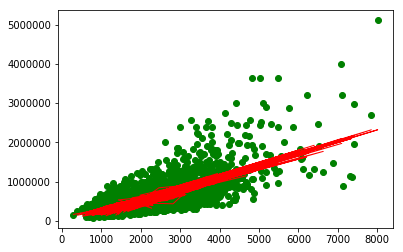

In [80]:
plt.scatter(x_test['sqft_living'] , y_test , color ='green')
plt.plot(x_test['sqft_living'] , y_predicted , color = 'red', linewidth =1)

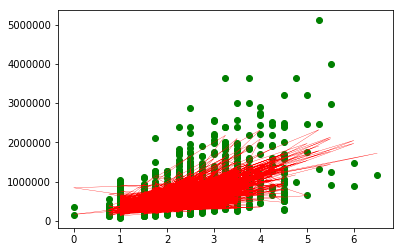

In [81]:
# choose the best feature to get plotting 
plt.scatter(x_test['bathrooms'] , y_test , color ='green')
plt.plot(x_test['bathrooms'] , y_predicted , color = 'red', linewidth =0.3)

In [82]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
mm= LinearRegression()
mm.fit(x_train ,y_train)
y_pred=mm.predict(x_test)
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test, y_pred))

35302777029.41519
122614.46001120009
